In [91]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd
from scipy import stats


matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18
# import matplotlib.pyplot as plt
# from numba import njit



In [92]:
def average_in_ranges(X, Y, step):
    # Create bins based on the specified step size
    min_x = np.min(X)
    max_x = np.max(X)
    bins = np.arange(min_x, max_x+step, step)
    
    # Initialize a list to store averages
    averages = []
    
    # Iterate through the bins to calculate averages
    for i in range(len(bins) - 1):
        mask = (X >= bins[i]) & (X < bins[i + 1])
        if np.any(mask):
            avg = np.mean(Y[mask])
        else:
            avg = 0  # or you can use 0 or np.nan if you prefer
        averages.append(avg)
    
    return bins, averages

On this notebook, we analyse more in depth the claim that the speed increases as it approaches the apoptotic cell.


# Video 1 

In [93]:
AC_video1_dataframe = pd.read_csv('data/apoptotic_cells/bigger_videos/video_1/AC_positions_video1_v2.csv' )
ids_AC_video1 = AC_video1_dataframe['Track ID'].unique()
AC_positions = pd.read_csv('data/apoptotic_cells/bigger_videos/video_1//AC_positions_video1.csv')
AC_names =AC_positions[['label']].values
AC_names = AC_names[:,0]
AC_video1_dataframe = AC_video1_dataframe.drop(columns=['Unnamed: 0'])
AC_video1_dataframe = AC_video1_dataframe.dropna()
# AC_video1_dataframe[AC_video1_dataframe['Classification']=='Before_Contact']['Track ID'].unique()

In [94]:
speeds = [] 
distances = []
for i,id in enumerate(ids_AC_video1):
    traj= AC_video1_dataframe[AC_video1_dataframe['Track ID'] == id].sort_values('Frame')
    # status = traj[traj['Frame']==0]['Classification'].values[0]
    
    # if status == 'Back':
    #     continue
    # elif status == 'After_Contact':
    #     continue
    # else:
   
    # print(f'id {id}')
  
    X = traj.values[:,2]
    Y = traj.values[:,3]
    time = traj.values[:,4]
    speed = traj.values[:,10]
    speeds.append(speed)
    min_dist = []
    for t in range(len(X)):
        dist_to_ACs = []
        for name in AC_names:
            x_AC = AC_positions[AC_positions['label']==name]['x (micron)'].values[0]
            y_AC = AC_positions[AC_positions['label']==name]['y (micron)'].values[0]
            dist = np.sqrt((x_AC-X[t])**2+(y_AC-Y[t])**2)
            dist_to_ACs.append(dist)
        distante_to_nearestAC = np.min(dist_to_ACs)
        min_dist.append(distante_to_nearestAC)
        # with open(f'data/apoptotic_cells/bigger_videos/video_1/distance_to_nearest_AC/lmin_time_id_{int(id)}.dat', 'a') as kk:
        #     kk.write(f'{time[t]:.3f} {distante_to_nearestAC:.5f} \n')
    distances.append(min_dist)
        
    

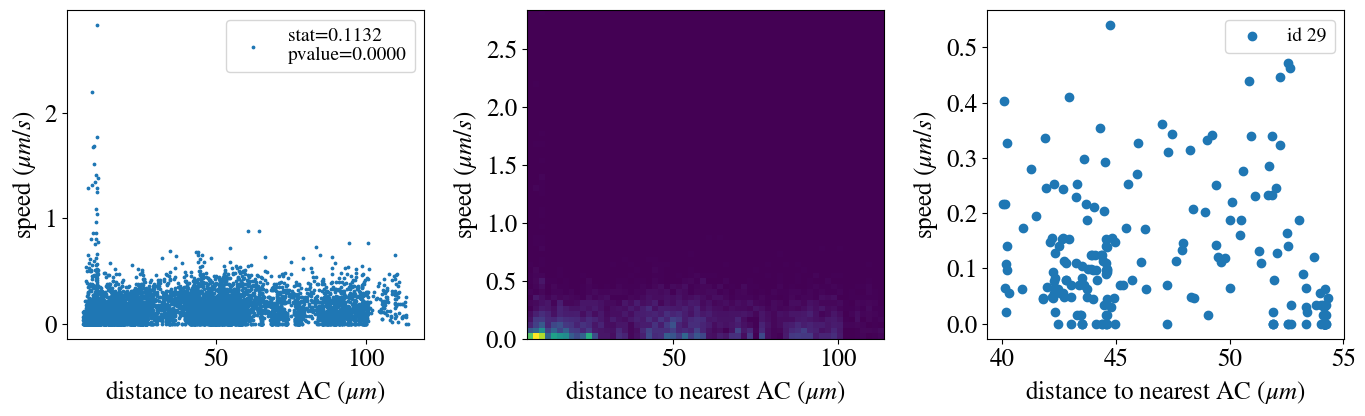

In [95]:
fig, ax = plt.subplots(1,3,figsize=(14,4.5))
flat_distances = np.hstack(distances)
flat_speeds = np.hstack(speeds) 
x = flat_distances
y = flat_speeds
H, xedges, yedges = np.histogram2d(x, y, bins=60)
H = H.T
res = stats.pearsonr(flat_distances,flat_speeds)
# xcenters = (xedges[:-1] + xedges[1:]) / 2
# ycenters = (yedges[:-1] + yedges[1:]) / 2

ax[1].pcolormesh(xedges,yedges,H)
ax[0].scatter(flat_distances,flat_speeds,s=3,label=f'stat={res[0]:.4f}'+'\n'+f'pvalue={res[1]:.4f}')
ax[2].scatter(distances[28],speeds[28], label =f'id {ids_AC_video1[28]}')

for a in ax:
    a.set_xlabel(r'distance to nearest AC ($\mu m$)')
    a.set_ylabel(r'speed ($\mu m/s$)')
    # a.semilogy()

for b in [0,2]:
    ax[b].legend(fontsize=14)
    
plt.tight_layout()
plt.show()
# plt.savefig('data/apoptotic_cells/bigger_videos/video_1/video1_speeds_vs_distance_to_AC.pdf',dpi=200,bbox_inches="tight")




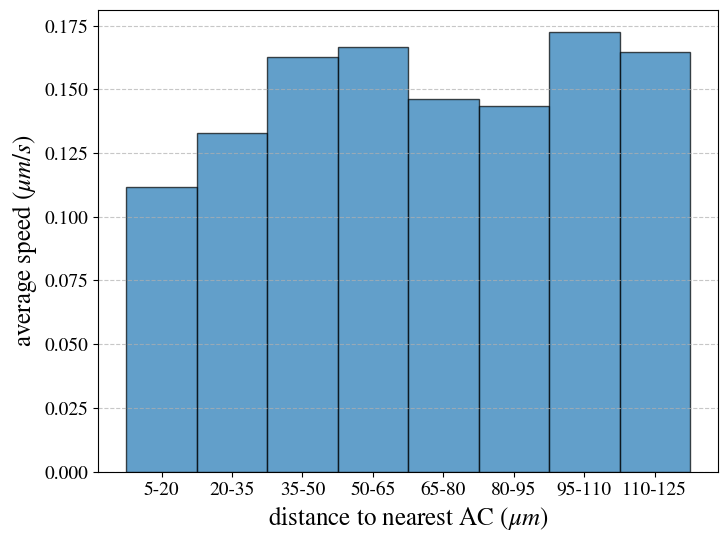

In [99]:
X = flat_distances
Y = flat_speeds
step_size = 15  # Adjust the step size as needed

bins, averages = average_in_ranges(X, Y, step_size)

# Plotting the histogram
range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
midpoints = bins[:-1] + step_size / 2
fig,ax = plt.subplots(figsize =(8,6))
ax.bar(bins[:-1], averages, width=step_size, align='edge', edgecolor='black', alpha=0.7)
ax.set_xlabel(r'distance to nearest AC ($\mu m$)')
ax.set_ylabel(r'average speed ($\mu m/s$)')

ax.set_xticks(midpoints, range_labels)
ax.tick_params(axis='both', labelsize=14)# Show bin edges on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('data/apoptotic_cells/bigger_videos/video_1/video1_speeds_vs_distance_to_AC_avgs_bar_plot.pdf',dpi=200,bbox_inches="tight")
plt.show()

Video 2

In [100]:

AC_video2_dataframe = pd.read_csv('data/apoptotic_cells/bigger_videos/video_2/AC_positions_video2_v2.csv')
ids_AC_video2 = AC_video2_dataframe['Track ID'].unique()
ACs_pos_DF = pd.read_csv('data/apoptotic_cells/bigger_videos/video_2/AC_positions_video2.csv',usecols=['X','Y'])
AC_positions = ACs_pos_DF.values
# AC_positions.shape
AC_names = ['A','B','C','D','E','F','G','H','I','J','K','L', 'M']
ids_that_touched_AC = [30,34,2,3,20,9,5,15,13,10,1,6]
AC_video2_dataframe = AC_video2_dataframe.drop(columns=['Unnamed: 0'])
AC_video2_dataframe = AC_video2_dataframe.dropna()
AC_video2_dataframe

,spot ID,Track ID,x (micron),y (micron),T (sec),Frame,Classification,squared displacement,vx,vy,speed
1,3033,0,120.681022,99.049518,3.346569,1,Before_Contact,0.053561,-0.031035,-0.062069,0.069395
2,3037,0,120.784522,99.153018,6.693138,2,Before_Contact,0.010712,0.031035,0.031034,0.043889
3,3042,0,120.370522,99.153018,10.039707,3,Before_Contact,0.182108,-0.124138,0.000000,0.124138
4,3045,0,120.474022,99.049518,13.386276,4,Before_Contact,0.139259,0.031034,-0.031034,0.043889
5,3048,0,120.370522,99.256518,16.732845,5,Before_Contact,0.171396,-0.031034,0.062069,0.069395
...,...,...,...,...,...,...,...,...,...,...,...
6055,148879,34,149.385027,52.819510,659.274078,197,Back,455.107129,0.082759,0.010345,0.083403
6056,148882,34,149.385027,52.716010,662.620647,198,Back,458.785003,0.000000,-0.031034,0.031034
6057,148885,34,149.730027,52.819510,665.967215,199,Back,463.426981,0.103448,0.031034,0.108003
6058,148888,34,149.730027,52.819510,669.313784,200,Back,463.426981,0.000000,0.000000,0.000000


In [101]:
speeds = [] 
distances = []
for i,id in enumerate(ids_AC_video2):
    traj= AC_video2_dataframe[AC_video2_dataframe['Track ID'] == id].sort_values('Frame')
    # status = traj[traj['Frame']==0]['Classification'].values[0]
    
    # if status == 'Back':
    #     print(f'id back {id}')
    #     X = traj.values[:,2]
    #     Y = traj.values[:,3]
    #     time = traj.values[:,4]
    # elif status == 'After_Contact':
    #     print(f'id always touch {id}')
    #     continue
    # else:
    # print(f'id {id}')
    # traj = traj[traj['Classification']=='Before_Contact']
    X = traj.values[:,2]
    Y = traj.values[:,3]
    time = traj.values[:,4]
    speed = traj.values[:,10]
    speeds.append(speed)
    min_dist = []
    for t in range(len(X)):
        dist_to_ACs = []
        for cell in AC_positions:
            dist = np.sqrt((cell[0]-X[t])**2+(cell[1]-Y[t])**2)
            dist_to_ACs.append(dist)
        distante_to_nearestAC = np.min(dist_to_ACs)

        min_dist.append(distante_to_nearestAC)
        # with open(f'data/apoptotic_cells/bigger_videos/video_2/distance_to_nearest_AC/lmin_time_id_{int(id)}.dat', 'a') as kk:
        #     kk.write(f'{time[t]:.3f} {distante_to_nearestAC:.5f} \n')
    distances.append(min_dist)

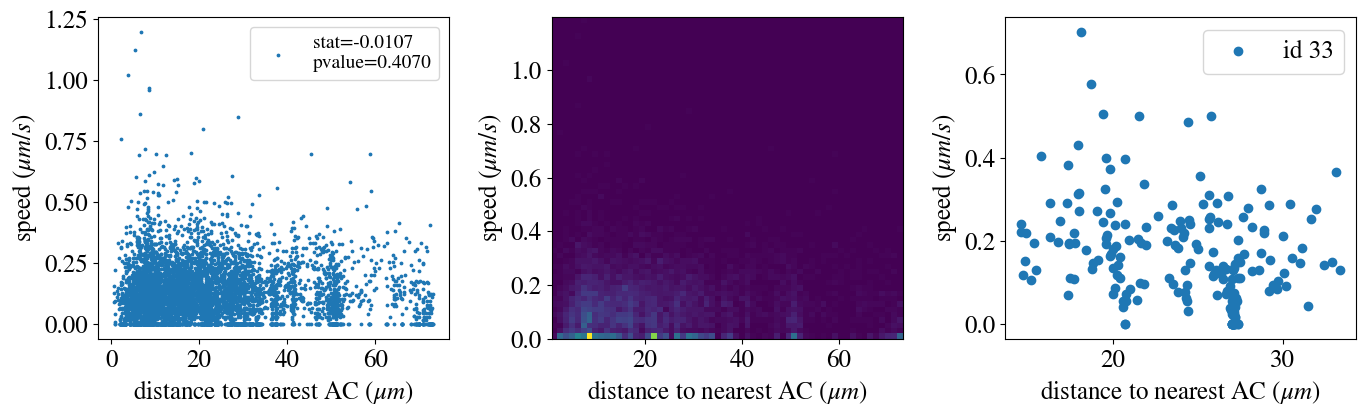

<Figure size 640x480 with 0 Axes>

In [102]:
fig, ax = plt.subplots(1,3,figsize=(14,4.5))
flat_distances = np.hstack(distances)
flat_speeds = np.hstack(speeds) 
x = flat_distances
y = flat_speeds
H, xedges, yedges = np.histogram2d(x, y, bins=60)
H = H.T
# xcenters = (xedges[:-1] + xedges[1:]) / 2
# ycenters = (yedges[:-1] + yedges[1:]) / 2
res = stats.pearsonr(flat_distances,flat_speeds)

ax[1].pcolormesh(xedges,yedges,H)
ax[0].scatter(flat_distances,flat_speeds,s=3,label=f'stat={res[0]:.4f}'+'\n'+f'pvalue={res[1]:.4f}')
ax[2].scatter(distances[28],speeds[28], label =f'id {ids_AC_video2[28]}')


for a in ax:
    a.set_xlabel(r'distance to nearest AC ($\mu m$)')
    a.set_ylabel(r'speed ($\mu m/s$)')
    # a.semilogy()

ax[2].legend()
ax[0].legend(fontsize=14)
plt.tight_layout()
plt.show()
plt.savefig('data/apoptotic_cells/bigger_videos/video_2/video2_speeds_vs_distance_to_AC.pdf',dpi=200,bbox_inches="tight")




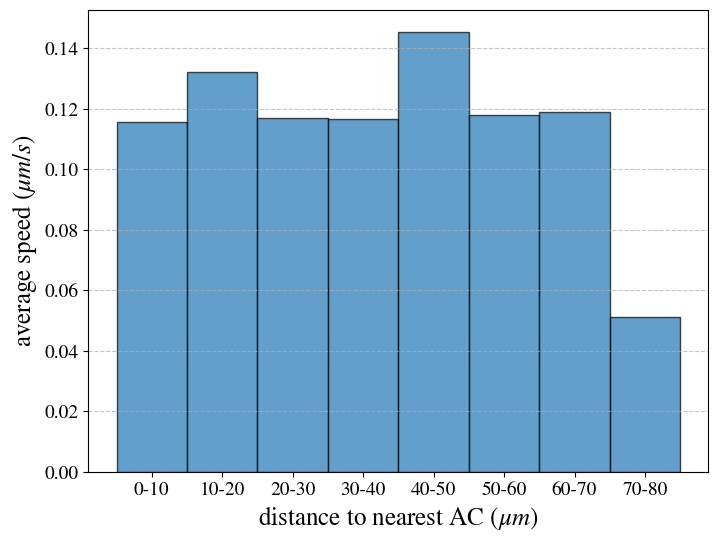

In [104]:
X = flat_distances
Y = flat_speeds
step_size = 10  # Adjust the step size as needed

bins, averages = average_in_ranges(X, Y, step_size)

# Plotting the histogram
range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
midpoints = bins[:-1] + step_size / 2
fig,ax = plt.subplots(figsize =(8,6))
ax.bar(bins[:-1], averages, width=step_size, align='edge', edgecolor='black', alpha=0.7)
ax.set_xlabel(r'distance to nearest AC ($\mu m$)')
ax.set_ylabel(r'average speed ($\mu m/s$)')

ax.set_xticks(midpoints, range_labels)
ax.tick_params(axis='both', labelsize=14)# Show bin edges on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('data/apoptotic_cells/bigger_videos/video_2/video2_speeds_vs_distance_to_AC_avgs_bar_plot.pdf',dpi=200,bbox_inches="tight")
plt.show()

Video 5

In [64]:
video=5
AC_video5_dataframe = pd.read_csv('data/apoptotic_cells/bigger_videos/video_5/AC_positions_video5_v2.csv')
ids_AC_video5 = AC_video5_dataframe['Track ID'].unique()
AC_positions = np.loadtxt('data/apoptotic_cells/bigger_videos/video_5/AC_positions.dat')
AC_video5_dataframe = AC_video5_dataframe.dropna()
AC_video5_dataframe = AC_video5_dataframe.drop(columns=['Unnamed: 0'])
AC_video5_dataframe

,spot ID,Track ID,x (micron),y (micron),t (sec),Frame,Classification,squared displacement,vx,vy,speed
1,2050,0,70.690513,40.882507,3.348253,1,After_Contact,0.005356,0.015517,-0.015517,0.021945
2,2053,0,70.690513,40.882507,6.696506,2,After_Contact,0.005356,0.000000,0.000000,0.000000
3,2056,0,70.690513,40.986007,10.044759,3,After_Contact,0.005356,0.000000,0.031034,0.031034
4,2059,0,70.690513,40.986007,13.393013,4,After_Contact,0.005356,0.000000,0.000000,0.000000
5,2062,0,70.690513,40.986007,16.741266,5,After_Contact,0.005356,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
6203,73762,30,116.230521,39.123007,656.257614,196,Before_Contact,277.715182,0.010345,-0.010345,0.014630
6204,73765,30,116.368521,39.261007,659.605867,197,Before_Contact,271.554445,0.041379,0.041379,0.058519
6205,73768,30,116.023521,39.364507,662.954120,198,Before_Contact,273.838536,-0.103448,0.031034,0.108003
6206,73771,30,115.920021,39.433507,666.302373,199,Before_Contact,273.473128,-0.031034,0.020690,0.037299


In [65]:
speeds = [] 
distances = []
for i,id in enumerate(ids_AC_video5):
    traj= AC_video5_dataframe[AC_video5_dataframe['Track ID'] == id].sort_values('Frame')

    X = traj.values[:,2]
    Y = traj.values[:,3]
    time = traj.values[:,4]
    speed = traj.values[:,10]
    speeds.append(speed)    
    min_dist = []
    for t in range(len(X)):
        dist_to_ACs = []
        for cell in AC_positions:
            dist = np.sqrt((cell[0]-X[t])**2+(cell[1]-Y[t])**2)
            dist_to_ACs.append(dist)
        distante_to_nearestAC = np.min(dist_to_ACs)
        min_dist.append(distante_to_nearestAC)
    distances.append(min_dist)

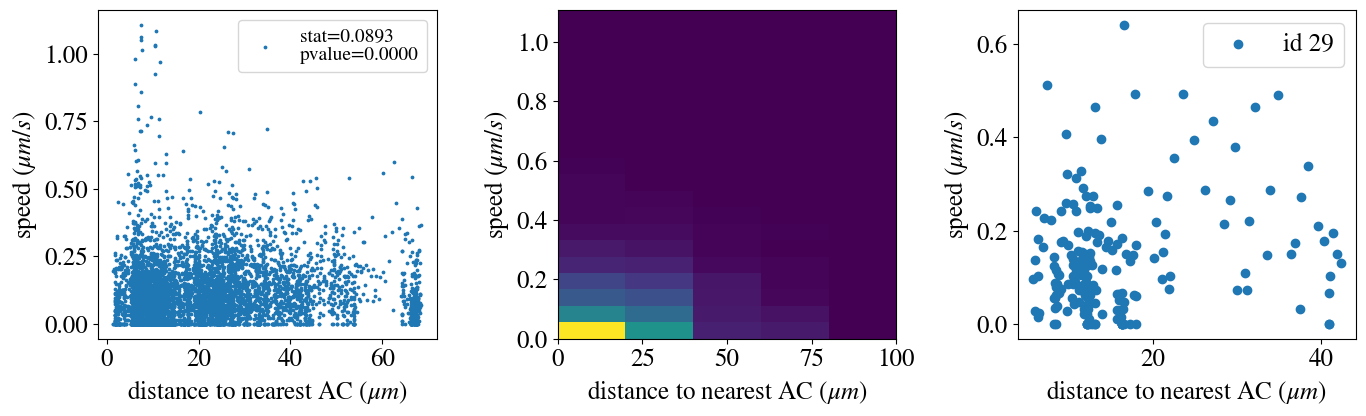

In [67]:
fig, ax = plt.subplots(1,3,figsize=(14,4.5))
flat_distances = np.hstack(distances)
flat_speeds = np.hstack(speeds)
x = flat_distances
y = flat_speeds
H, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(0,120,20),20])
H = H.T
# xcenters = (xedges[:-1] + xedges[1:]) / 2
# ycenters = (yedges[:-1] + yedges[1:]) / 2
res = stats.pearsonr(flat_distances,flat_speeds)

ax[1].pcolormesh(xedges,yedges,H)
ax[0].scatter(flat_distances,flat_speeds,s=3,label=f'stat={res[0]:.4f}'+'\n'+f'pvalue={res[1]:.4f}')
ax[2].scatter(distances[29],speeds[29], label =f'id {ids_AC_video5[29]}')



for a in ax:
    a.set_xlabel(r'distance to nearest AC ($\mu m$)')
    a.set_ylabel(r'speed ($\mu m/s$)')
    # a.semilogy()
    # a.set_ylim((0,0.5))

ax[2].legend()
ax[0].legend(fontsize=14)
plt.tight_layout()
plt.show()
# plt.savefig('data/apoptotic_cells/bigger_videos/video_5/video5_speeds_vs_distance_to_AC.pdf',dpi=200,bbox_inches="tight")




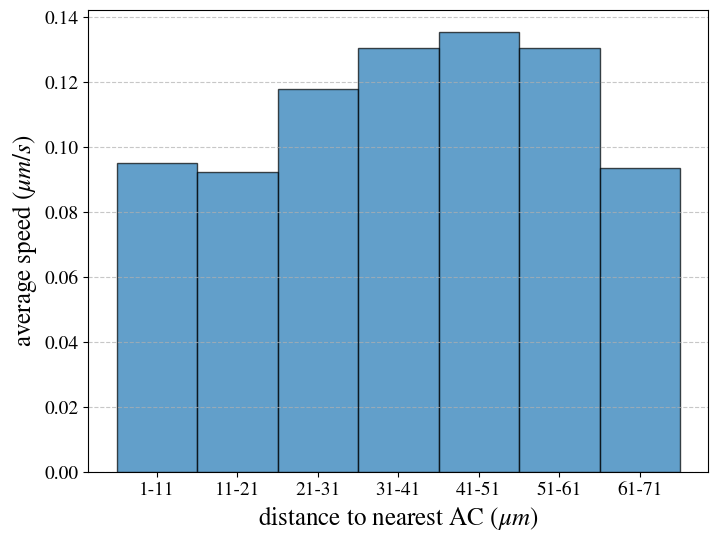

In [87]:
X = flat_distances
Y = flat_speeds
step_size = 10  # Adjust the step size as needed

bins, averages = average_in_ranges(X, Y, step_size)

# Plotting the histogram
range_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
midpoints = bins[:-1] + step_size / 2
fig,ax = plt.subplots(figsize =(8,6))
ax.bar(bins[:-1], averages, width=step_size, align='edge', edgecolor='black', alpha=0.7)
ax.set_xlabel(r'distance to nearest AC ($\mu m$)')
ax.set_ylabel(r'average speed ($\mu m/s$)')

ax.set_xticks(midpoints, range_labels)
ax.tick_params(axis='both', labelsize=14)# Show bin edges on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('data/apoptotic_cells/bigger_videos/video_5/video5_speeds_vs_distance_to_AC_avgs_bar_plot.pdf',dpi=200,bbox_inches="tight")
plt.show()

In [82]:
flat_distances.max()

68.47924173455849